In [ ]:
!pip install alibi[tensorflow]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_set='/content/data/train'
val_set='/content/data/val'
test_set='/content/data/test'

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score


In [4]:
import zipfile
import os
path_to_zip_file = '/content/drive/MyDrive/[02] UTAD/[01] 2023_2024/[04] Artigo HCIST/dataset_kvasir_caps_HCIST.zip'
directory_to_extract_to = '/content/data'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [5]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [6]:

train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=True,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=True,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle = False,
    class_mode = 'categorical')

Found 1600 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'0_normal': 0, '2_polyps': 1}

In [8]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Carregar o modelo
model = load_model('/content/drive/MyDrive/[02] UTAD/[01] 2023_2024/[04] Artigo HCIST/Modelos/VGG16_trained.h5')

# Imprimir a estrutura do modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 gaussian_noise (GaussianNo  (None, 7, 7, 512)         0         
 ise)                                                            
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                        

In [9]:
test_generator.reset()
results = model.evaluate(test_generator, steps=len(test_generator))

print(f"Perda de Validação: {results[0]}")
print(f"Acurácia de Validação: {results[1] * 100:.2f}%")
print(f"Precisão de Validação: {results[2] * 100:.2f}%")
print(f"Recall de Validação: {results[3] * 100:.2f}%")
print(f"AUC de Validação: {results[4]}")

test_generator.reset()

true_classes = test_generator.classes

predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Acurácia calculada: {accuracy * 100:.2f}%")


25/25 [==============================] - 284s 11s/step - loss: 0.2555 - accuracy: 0.9050 - precision: 0.9050 - recall: 0.9050 - auc: 0.9763
Perda de Validação: 0.255454421043396
Acurácia de Validação: 90.50%
Precisão de Validação: 90.50%
Recall de Validação: 90.50%
AUC de Validação: 0.9763437509536743
25/25 [==============================] - 291s 11s/step


NameError: name 'accuracy_score' is not defined

In [11]:
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Acurácia calculada: {accuracy * 100:.2f}%")


NameError: name 'accuracy_score' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Encontrar índices das previsões incorretas
incorrects = np.nonzero(predicted_classes != true_classes)[0]

# Obter caminhos das imagens incorretas
if len(incorrects) > 0:
    incorrect_images = [test_generator.filepaths[i] for i in incorrects]
else:
    print("Não há imagens classificadas incorretamente.")
    incorrect_images = []


In [ ]:
type(incorrect_images)

In [ ]:
len(incorrect_images)

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Encontrar os índices das previsões incorretas
incorrect_indices = np.nonzero(predicted_classes != true_classes)[0]

# Obter os caminhos das imagens e as previsões/classes reais correspondentes
incorrect_images = [test_generator.filepaths[i] for i in incorrect_indices]
predicted_labels = [predicted_classes[i] for i in incorrect_indices]
true_labels = [true_classes[i] for i in incorrect_indices]

# Ajustar o número de imagens para mostrar
num_images_to_show = min(len(incorrect_images), 10)

# Mapeamento de índices para nomes de classes
class_names = {v: k for k, v in test_generator.class_indices.items()}

# Plotar as imagens
fig, axes = plt.subplots(nrows=1, ncols=num_images_to_show, figsize=(20, 2 * num_images_to_show))
if num_images_to_show > 1:
    for ax, img_path, pred, true in zip(axes.flatten(), incorrect_images[:num_images_to_show], predicted_labels[:num_images_to_show], true_labels[:num_images_to_show]):
        img = load_img(img_path, target_size=(224, 224))
        ax.imshow(img)
        ax.set_title(f"Pred:({pred}), True:({true})")
        ax.axis('off')
else:  # Se houver apenas uma imagem para mostrar
    ax = axes
    img = load_img(incorrect_images[0], target_size=(224, 224))
    ax.imshow(img)
    ax.set_title(f"Pred: {class_names[predicted_labels[0]]} ({predicted_labels[0]}), True: {class_names[true_labels[0]]} ({true_labels[0]})\nPath: {incorrect_images[0]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Encontrar os índices das previsões corretas
correct_indices = np.nonzero(predicted_classes == true_classes)[0]

# Obter os caminhos das imagens e as previsões/classes reais correspondentes
correct_images = [test_generator.filepaths[i] for i in correct_indices]
predicted_labels = [predicted_classes[i] for i in correct_indices]
true_labels = [true_classes[i] for i in correct_indices]

# Ajustar o número de imagens para mostrar
num_images_to_show = min(len(correct_images), 10)

# Mapeamento de índices para nomes de classes
class_names = {v: k for k, v in test_generator.class_indices.items()}

# Plotar as imagens
fig, axes = plt.subplots(nrows=1, ncols=num_images_to_show, figsize=(20, 2 * num_images_to_show))
if num_images_to_show > 1:
    for ax, img_path, pred, true in zip(axes.flatten(), correct_images[:num_images_to_show], predicted_labels[:num_images_to_show], true_labels[:num_images_to_show]):
        img = load_img(img_path, target_size=(224, 224))
        ax.imshow(img)
        ax.set_title(f"Pred: ({pred}), True: ({true})")
        ax.axis('off')
else:  # Se houver apenas uma imagem para mostrar
    ax = axes
    img = load_img(correct_images[0], target_size=(224, 224))
    ax.imshow(img)
    ax.set_title(f"Pred:({predicted_labels[0]}), True:({true_labels[0]})")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Encontrar os índices das previsões corretas da classe 1
correct_class1_indices = [idx for idx in np.nonzero(predicted_classes == true_classes)[0] if true_classes[idx] == 1]

# Obter os caminhos das imagens e as previsões/classes reais correspondentes da classe 1
correct_class1_images = [test_generator.filepaths[i] for i in correct_class1_indices]
predicted_class1_labels = [predicted_classes[i] for i in correct_class1_indices]
true_class1_labels = [true_classes[i] for i in correct_class1_indices]

# Ajustar o número de imagens para mostrar
num_images_to_show = min(len(correct_class1_images), 10)

# Mapeamento de índices para nomes de classes
class_names = {v: k for k, v in test_generator.class_indices.items()}

# Plotar as imagens
fig, axes = plt.subplots(nrows=1, ncols=num_images_to_show, figsize=(20, 2 * num_images_to_show))
if num_images_to_show > 1:
    for ax, img_path, pred, true in zip(axes.flatten(), correct_class1_images[:num_images_to_show], predicted_class1_labels[:num_images_to_show], true_class1_labels[:num_images_to_show]):
        img = load_img(img_path, target_size=(224, 224))
        ax.imshow(img)
        ax.set_title(f"Pred:({pred}), True:({true})")
        ax.axis('off')
elif num_images_to_show == 1:  # Se houver apenas uma imagem para mostrar
    ax = axes
    img = load_img(correct_class1_images[0], target_size=(224, 224))
    ax.imshow(img)
    ax.set_title(f"Pred:({predicted_class1_labels[0]}), True:({true_class1_labels[0]})")
    ax.axis('off')
else:
    print("Não há imagens corretas da classe 1 para exibir.")

plt.tight_layout()
plt.show()


In [ ]:
from alibi.explainers import AnchorImage

In [ ]:
image_path = '/content/data/test/2_polyps/test_polyps_ (1).jpg'

In [ ]:
original_image = load_img(image_path, target_size = (224,224))

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image = img_to_array(original_image)

In [ ]:
image = np.expand_dims(image, axis = 0)

In [ ]:
print(image[0].shape)

(224, 224, 3)


In [ ]:
preds = model.predict(image)

1/1 [==============================] - 0s 378ms/step


In [ ]:
previsao = np.argmax(preds, axis = 1)

In [ ]:
print(previsao)

[1]


In [ ]:
explainer = AnchorImage(
    predictor=lambda x: model.predict(x),
    image_shape=(224, 224, 3),  # Ajuste conforme o necessário
    segmentation_fn='slic',
    segmentation_kwargs={'n_segments': 15, 'compactness': 20, 'sigma': 0.5}
)

1/1 [==============================] - 0s 481ms/step


In [ ]:
explanation = explainer.explain(image[0], threshold=0.95, p_sample=0.5, tau=0.25)

4/4 [==============================] - 39s 9s/step


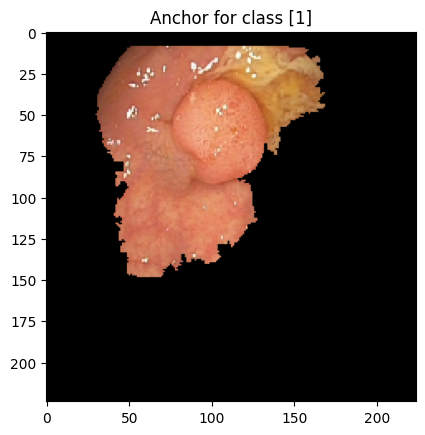

In [ ]:
# Visualizar a explicação
plt.imshow(explanation.anchor)
plt.title(f'Anchor for class {previsao}')
plt.show()

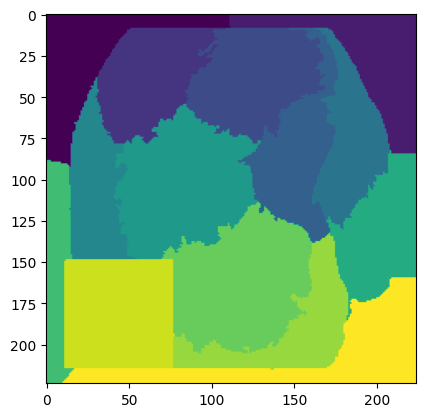

In [ ]:
plt.imshow(explanation.segments);

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

#incorrect_indices = np.nonzero((true_classes == 1) & (predicted_classes == 0))[0]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Encontrar índices onde a classe verdadeira é 0 e a classe prevista também é 0
correct_indices_0 = np.nonzero((true_classes == 0) & (predicted_classes == 0))[0]

# Encontrar índices onde a classe verdadeira é 1 e a classe prevista também é 1
correct_indices_1 = np.nonzero((true_classes == 1) & (predicted_classes == 1))[0]

# Encontrar índices onde a classe verdadeira é 0 e a classe prevista é 1
incorrect_indices_0_predicted_1 = np.nonzero((true_classes == 0) & (predicted_classes == 1))[0]

# Encontrar índices onde a classe verdadeira é 1 e a classe prevista é 0
incorrect_indices_1_predicted_0 = np.nonzero((true_classes == 1) & (predicted_classes == 0))[0]

In [21]:
correct_images_0 = [test_generator.filepaths[i] for i in correct_indices_0]

selected_images_paths = correct_images_0[:3]

images_arrays = []
for img_path in selected_images_paths:
    img = load_img(img_path, target_size=(224, 224))  # Assumindo que você quer redimensionar para 224x224
    img_array = img_to_array(img)
    images_arrays.append(img_array)

images_arrays = np.array(images_arrays)

pred1 = model.predict(image[0])
pred2 = model.predict(image[1])
pred3 = model.predict(image[2])

previsao1 = np.argmax(pred1, axis = 1)
previsao2 = np.argmax(pred2, axis = 1)
previsao3 = np.argmax(pred3, axis = 1)

print(previsao1)
print(previsao2)
print(previsao3)

explanation1 = explainer.explain(image[0], threshold=0.95, p_sample=0.5, tau=0.25)
explanation2 = explainer.explain(image[1], threshold=0.95, p_sample=0.5, tau=0.25)
explanation3 = explainer.explain(image[2], threshold=0.95, p_sample=0.5, tau=0.25)

# Visualizar a explicação
plt.imshow(explanation1.anchor)
plt.title(f'Anchor for class {previsao}')
plt.show()

# Visualizar a explicação
plt.imshow(explanation2.anchor)
plt.title(f'Anchor for class {previsao}')
plt.show()

# Visualizar a explicação
plt.imshow(explanation3.anchor)
plt.title(f'Anchor for class {previsao}')
plt.show()

plt.imshow(explanation1.segments);

plt.imshow(explanation2.segments);

plt.imshow(explanation3.segments);


NameError: name 'load_img' is not defined

In [15]:
correct_images_1 = [test_generator.filepaths[i] for i in correct_indices_1]

In [16]:
incorrect_images_0_predicted_1 = [test_generator.filepaths[i] for i in incorrect_indices_0_predicted_1]

In [17]:
incorrect_images_1_predicted_0 = [test_generator.filepaths[i] for i in incorrect_indices_1_predicted_0]